In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import re

In [5]:
df_b_5x = pd.read_csv('plot_data/FF_d7_Brain5xFAD_area_21Dec23.csv')
df_b_wt = pd.read_csv('plot_data/FF_d7_BrainWT_area_21Dec23.csv')
df_liver = pd.read_csv('plot_data/FF_d7_Liver_area_21Dec23.csv')
df = pd.concat([df_b_wt, df_b_5x, df_liver])
#print len sum of all dataframes
print(len(df_b_wt) + len(df_b_5x) + len(df_liver))
#drop Cluster_Label and Group columns
df = df.drop(['Cluster_Label', 'Group', 'Transition'], axis=1)
#drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

465


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Area,Area_RT,Area_Ratio,FAC,TG
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,2693.0,0.000000,NaN,FA16:1,TG(52:5)
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,6754.0,0.044150,NaN,FA16:1,TG(52:5)
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,16093.0,0.044667,NaN,FA16:1,TG(52:5)
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,41227.0,0.089067,NaN,FA16:1,TG(52:5)
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,2048.0,0.000000,NaN,FA16:1,TG(52:5)
...,...,...,...,...,...,...,...,...,...,...,...,...
171,"[TG(58:7),]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,808.0,17229.0,0.222300,NaN,FA18:1,TG(58:7)
172,"[TG(58:7),]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.27,2162.0,80728.0,0.621950,NaN,FA18:1,TG(58:7)
173,"[TG(58:7),]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,2006.0,77579.0,0.710500,NaN,FA18:1,TG(58:7)
174,"[TG(58:7),]_FA18:1",12012023_FAD131_M4_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.18,885.0,18838.0,0.621967,NaN,FA18:1,TG(58:7)


In [7]:
#Print unique of group Lipid and db_pos
print(df['Lipid'].unique())
print(df['db'].unique())


['[TG(52:5)]_FA16:1' '[TG(50:3)]_FA18:1' '[TG(55:8),TG(54:1)]_FA18:1'
 '[TG(55:9),TG(54:2)]_FA18:1' '[TG(55:10),TG(54:3)]_FA18:1'
 '[TG(55:11),TG(54:4)]_FA18:1' '[TG(54:5)]_FA18:1' '[TG(54:6)]_FA18:1'
 '[TG(57:9),TG(56:2)]_FA18:1' '[TG(57:10),TG(56:3)]_FA18:1'
 '[TG(57:11),TG(56:4)]_FA18:1' '[TG(56:7),]_FA18:1'
 '[TG(55:11),TG(54:4)]_FA16:1' '[TG(56:7),]_FA16:1' '[TG(52:7),]_FA18:1'
 '[TG(56:10),TG(55:3)]_FA18:1' '[TG(56:11),TG(55:4)]_FA18:1'
 '[TG(57:12),TG(56:5)]_FA18:1' '[TG(56:6)]_FA18:1'
 '[TG(59:11),TG(58:4)]_FA18:1' '[TG(59:12),TG(58:5)]_FA18:1'
 '[TG(59:13),TG(58:6)]_FA18:1' '[TG(58:7),]_FA18:1']
['n-7' 'n-9' 'n-10']


Add Liver Brain label

In [8]:

# Define function to extract biology term
def extract_biology(sample_id):
    for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
        if term in sample_id.lower():
            return term
    return None

# Apply function to create new column
df['Biology'] = df['Sample_ID'].apply(extract_biology)
df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# df.to_csv('df_for_gpt.csv')

# Extracting the mouse name from the 'Sample_ID' column
df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
# df.to_csv('FF_df_withBioGenoMouse.csv')
df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,2693.0,0.000000,NaN,FA16:1,TG(52:5),cereb,WT,DOD94_F3
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,6754.0,0.044150,NaN,FA16:1,TG(52:5),cortex,WT,DOD94_F3
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,16093.0,0.044667,NaN,FA16:1,TG(52:5),dienc,WT,DOD94_F3
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,41227.0,0.089067,NaN,FA16:1,TG(52:5),cortex,WT,FAD184_F3
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,2048.0,0.000000,NaN,FA16:1,TG(52:5),dienc,WT,FAD184_F3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,"[TG(58:7),]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,808.0,17229.0,0.222300,NaN,FA18:1,TG(58:7),liver,5xFAD,DOD73_M2
172,"[TG(58:7),]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.27,2162.0,80728.0,0.621950,NaN,FA18:1,TG(58:7),liver,5xFAD,FAD131_M1
173,"[TG(58:7),]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,2006.0,77579.0,0.710500,NaN,FA18:1,TG(58:7),liver,5xFAD,FAD131_M2
174,"[TG(58:7),]_FA18:1",12012023_FAD131_M4_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.18,885.0,18838.0,0.621967,NaN,FA18:1,TG(58:7),liver,5xFAD,FAD131_M4


In [9]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()



# Assuming df is your DataFrame

# Step 1: Extract the last part of the Lipid name
df['Lipid_End'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['Lipid_End', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'Lipid_End' column
df['Lipid_End'] = pd.Categorical(df['Lipid_End'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['Lipid_End', 'Lipid'])


df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,2693.0,0.000000,NaN,FA16:1,TG(52:5),cereb,WT,DOD94_F3,31,FA16:1
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,6754.0,0.044150,NaN,FA16:1,TG(52:5),cortex,WT,DOD94_F3,32,FA16:1
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,16093.0,0.044667,NaN,FA16:1,TG(52:5),dienc,WT,DOD94_F3,33,FA16:1
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,41227.0,0.089067,NaN,FA16:1,TG(52:5),cortex,WT,FAD184_F3,34,FA16:1
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,2048.0,0.000000,NaN,FA16:1,TG(52:5),dienc,WT,FAD184_F3,35,FA16:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,770.0,7862.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M1,329,FA18:1
167,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,6986.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M2,330,FA18:1
168,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,4944.0,0.044417,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD173_M1,331,FA18:1
169,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,15538.0,0.266450,NaN,FA18:1,"TG(58:6), TG(59:13)",liver,5xFAD,FAD131_M1,332,FA18:1


copy df to df2 to do db calcuations

In [10]:
# Copying df2 to create df3
df2 = df.copy()
import pandas as pd

# Assuming df is your DataFrame
# Replace df with your actual DataFrame variable name if it's different

# Group by 'SLBG_group' and sum the 'OzESI_Intensity' for each group
# Assign the summed intensity back to each row in the original DataFrame
df2['total_intensity'] = df2.groupby('SLBG_group')['Area'].transform('sum')



df2

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,2693.0,0.000000,NaN,FA16:1,TG(52:5),cereb,WT,DOD94_F3,31,FA16:1,2693.0
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,6754.0,0.044150,NaN,FA16:1,TG(52:5),cortex,WT,DOD94_F3,32,FA16:1,6754.0
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,16093.0,0.044667,NaN,FA16:1,TG(52:5),dienc,WT,DOD94_F3,33,FA16:1,16093.0
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,41227.0,0.089067,NaN,FA16:1,TG(52:5),cortex,WT,FAD184_F3,34,FA16:1,41227.0
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,2048.0,0.000000,NaN,FA16:1,TG(52:5),dienc,WT,FAD184_F3,35,FA16:1,2048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,770.0,7862.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M1,329,FA18:1,7862.0
167,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,6986.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M2,330,FA18:1,6986.0
168,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,4944.0,0.044417,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD173_M1,331,FA18:1,4944.0
169,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,15538.0,0.266450,NaN,FA18:1,"TG(58:6), TG(59:13)",liver,5xFAD,FAD131_M1,332,FA18:1,15538.0


In [13]:
import pandas as pd

# Assuming df2 is your DataFrame
# Replace df2 with your actual DataFrame variable name if it's different

# Function to calculate n-9% for each row
def calculate_n9_percent(row):
    if row['db'] == 'n-9':
        return (row['Area'] / row['total_intensity']) * 100
    else:
        return 0  # Return 0 for rows where db_pos is not 'n-9'

# Apply the function to each row
df2['n-9%'] = df2.apply(calculate_n9_percent, axis=1)

# Rename df2 to df3 as per your requirement
df3 = df2.copy()
# df3.to_excel('df3.xlsx')

#print cortex FAD 185
df3

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity,n-9%
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,2693.0,0.000000,NaN,FA16:1,TG(52:5),cereb,WT,DOD94_F3,31,FA16:1,2693.0,0.0
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,6754.0,0.044150,NaN,FA16:1,TG(52:5),cortex,WT,DOD94_F3,32,FA16:1,6754.0,0.0
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,16093.0,0.044667,NaN,FA16:1,TG(52:5),dienc,WT,DOD94_F3,33,FA16:1,16093.0,0.0
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,41227.0,0.089067,NaN,FA16:1,TG(52:5),cortex,WT,FAD184_F3,34,FA16:1,41227.0,0.0
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,2048.0,0.000000,NaN,FA16:1,TG(52:5),dienc,WT,FAD184_F3,35,FA16:1,2048.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,770.0,7862.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M1,329,FA18:1,7862.0,100.0
167,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,6986.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M2,330,FA18:1,6986.0,100.0
168,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,4944.0,0.044417,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD173_M1,331,FA18:1,4944.0,100.0
169,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,15538.0,0.266450,NaN,FA18:1,"TG(58:6), TG(59:13)",liver,5xFAD,FAD131_M1,332,FA18:1,15538.0,100.0


In [15]:
df4 = df3.copy()    
#drop all db_pos != n-9
df4 = df4[df4['db'] == 'n-9']
# df4.to_excel('df4.xlsx')
df4

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity,n-9%
6,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,21302.0,0.044400,0.04,FA16:1,TG(52:5),cereb,WT,FAD185_M4,36,FA16:1,562706.0,3.785636
8,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-9,760.7,599.5,12.07,3054.0,20725.0,0.088817,0.07,FA16:1,TG(52:5),cortex,WT,FAD185_M4,37,FA16:1,323043.0,6.415555
12,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,1045.0,4180.0,0.000000,0.04,FA16:1,TG(52:5),cereb,WT,FAD189_M3,40,FA16:1,110589.0,3.779761
14,[TG(52:5)]_FA16:1,11282023_FAD189_M3_WT_cortex_O3on_01,n-9,760.7,599.5,12.07,1638.0,15120.0,0.088800,0.04,FA16:1,TG(52:5),cortex,WT,FAD189_M3,41,FA16:1,355777.0,4.249853
8,[TG(52:5)]_FA16:1,11292023_FAD189_M1_5xFAD_cereb_O3on_01,n-9,760.7,599.5,12.42,1812.0,18802.0,0.088817,0.03,FA16:1,TG(52:5),cereb,5xFAD,FAD189_M1,50,FA16:1,666569.0,2.820713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,770.0,7862.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M1,329,FA18:1,7862.0,100.000000
167,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,6986.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M2,330,FA18:1,6986.0,100.000000
168,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,4944.0,0.044417,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD173_M1,331,FA18:1,4944.0,100.000000
169,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,15538.0,0.266450,NaN,FA18:1,"TG(58:6), TG(59:13)",liver,5xFAD,FAD131_M1,332,FA18:1,15538.0,100.000000


In [17]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_brain
df_brain = df3.copy()
df_brain = df_brain[df_brain['Biology'] != 'liver']

# Filter to get rows where db_pos is 'n-9'
n_9_df = df_brain[df_brain['db'] == 'n-9']

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_brain
df_brain = df_brain.merge(grouped, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_brain['n-9_avg'] = df_brain['n-9_avg'].round(1)
df_brain['std_dev'] = df_brain['std_dev'].round(1)

# Display the last 50 rows of the DataFrame to verify the results
df_brain.head(50)


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Area,Area_RT,Area_Ratio,...,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End,total_intensity,n-9%,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,2693.0,0.000000,NaN,...,TG(52:5),cereb,WT,DOD94_F3,31,FA16:1,2693.0,0.000000,4.6,1.3
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,6754.0,0.044150,NaN,...,TG(52:5),cortex,WT,DOD94_F3,32,FA16:1,6754.0,0.000000,4.6,1.3
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,16093.0,0.044667,NaN,...,TG(52:5),dienc,WT,DOD94_F3,33,FA16:1,16093.0,0.000000,4.6,1.3
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,41227.0,0.089067,NaN,...,TG(52:5),cortex,WT,FAD184_F3,34,FA16:1,41227.0,0.000000,4.6,1.3
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,2048.0,0.000000,NaN,...,TG(52:5),dienc,WT,FAD184_F3,35,FA16:1,2048.0,0.000000,4.6,1.3
5,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,541404.0,0.355533,0.04,...,TG(52:5),cereb,WT,FAD185_M4,36,FA16:1,562706.0,0.000000,4.6,1.3
6,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,21302.0,0.044400,0.04,...,TG(52:5),cereb,WT,FAD185_M4,36,FA16:1,562706.0,3.785636,4.6,1.3
7,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,16896.0,302318.0,0.222300,0.07,...,TG(52:5),cortex,WT,FAD185_M4,37,FA16:1,323043.0,0.000000,4.6,1.3
8,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-9,760.7,599.5,12.07,3054.0,20725.0,0.088817,0.07,...,TG(52:5),cortex,WT,FAD185_M4,37,FA16:1,323043.0,6.415555,4.6,1.3
9,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_dienc_O3on_01,n-7,788.7,599.5,12.02,1840.0,21688.0,0.089067,NaN,...,TG(52:5),dienc,WT,FAD185_M4,38,FA16:1,21688.0,0.000000,4.6,1.3


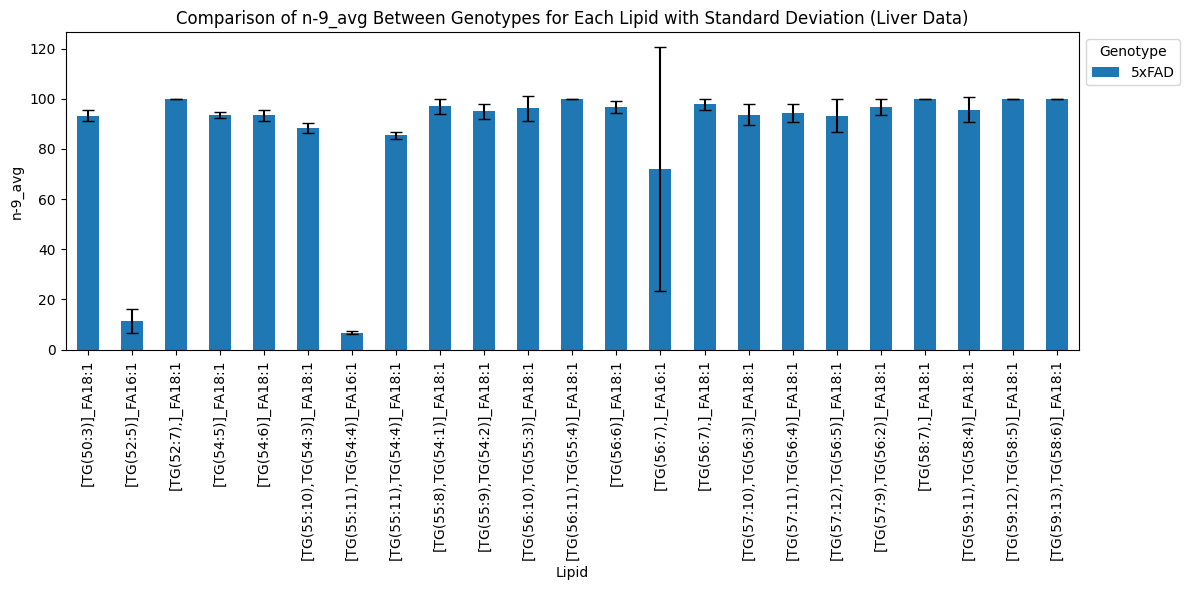

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,5xFAD,11.5,4.7
11,"[TG(55:11),TG(54:4)]_FA16:1",5xFAD,6.8,0.5
18,"[TG(56:7),]_FA16:1",5xFAD,72.0,48.5
23,[TG(50:3)]_FA18:1,5xFAD,93.3,2.1
33,"[TG(52:7),]_FA18:1",5xFAD,100.0,0.0
35,[TG(54:5)]_FA18:1,5xFAD,93.4,1.2
45,[TG(54:6)]_FA18:1,5xFAD,93.4,2.3
55,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,88.4,1.9
68,"[TG(55:11),TG(54:4)]_FA18:1",5xFAD,85.4,1.4
80,"[TG(55:8),TG(54:1)]_FA18:1",5xFAD,97.1,3.0


In [18]:
import pandas as pd

# Assuming df3 is your DataFrame
# Create a copy of df3 to df_liver
df_liver = df3.copy()
df_liver = df_liver[df_liver['Biology'] == 'liver']

# Filter to get rows where db_pos is 'n-9'
n_9_df = df_liver[df_liver['db'] == 'n-9']

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped = n_9_df.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_liver
df_liver = df_liver.merge(grouped, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_liver['n-9_avg'] = df_liver['n-9_avg'].round(1)
df_liver['std_dev'] = df_liver['std_dev'].round(1)

#print out n-9_avg and std_dev for each lipid
df_liver_drop = df_liver[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()

# Display the last 50 rows of the DataFrame to verify the results
df_liver

# Pivot the DataFrame to have Genotype as columns
pivot_df_liver = df_liver_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_liver.plot(kind='bar', yerr=df_liver_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9_avg')
plt.title('Comparison of n-9_avg Between Genotypes for Each Lipid with Standard Deviation (Liver Data)')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
plt.show()




df_liver_drop

BRAIN 5xFAD vs WT

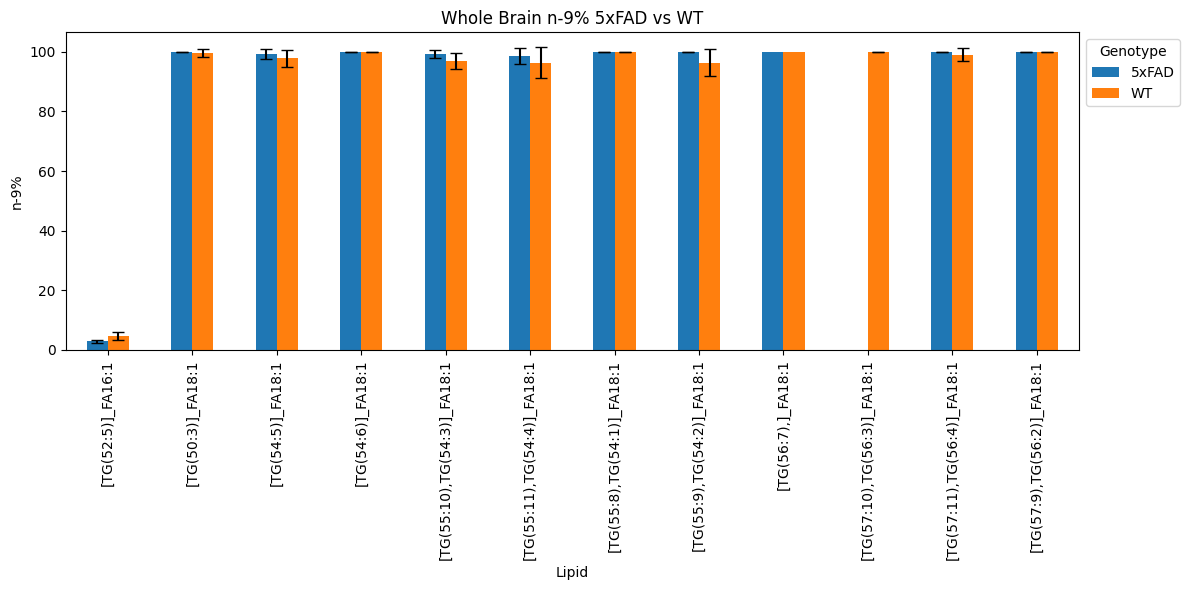

In [19]:


df_brain_drop = df_brain[['Lipid', 'Genotype','n-9_avg', 'std_dev']].drop_duplicates()


# Pivot the DataFrame to have Genotype as columns
pivot_df = df_brain_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')
###########
# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df['Sort_Key'] = pivot_df.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df = pivot_df.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df.drop('Sort_Key', axis=1, inplace=True)
############

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', yerr=df_brain_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)




# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Whole Brain n-9% 5xFAD vs WT')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
# #save figure to Barplot_OzON/9% folder
# plt.savefig('Barplot_OzON/9%/Whole Brain 5xFAD vs WT.png', dpi=300)
# #save as pdf
# plt.savefig('Barplot_OzON/9%/Whole Brain 5xFAD vs WT.pdf', dpi=300)
plt.show()

each brain region 5xfad vs WT

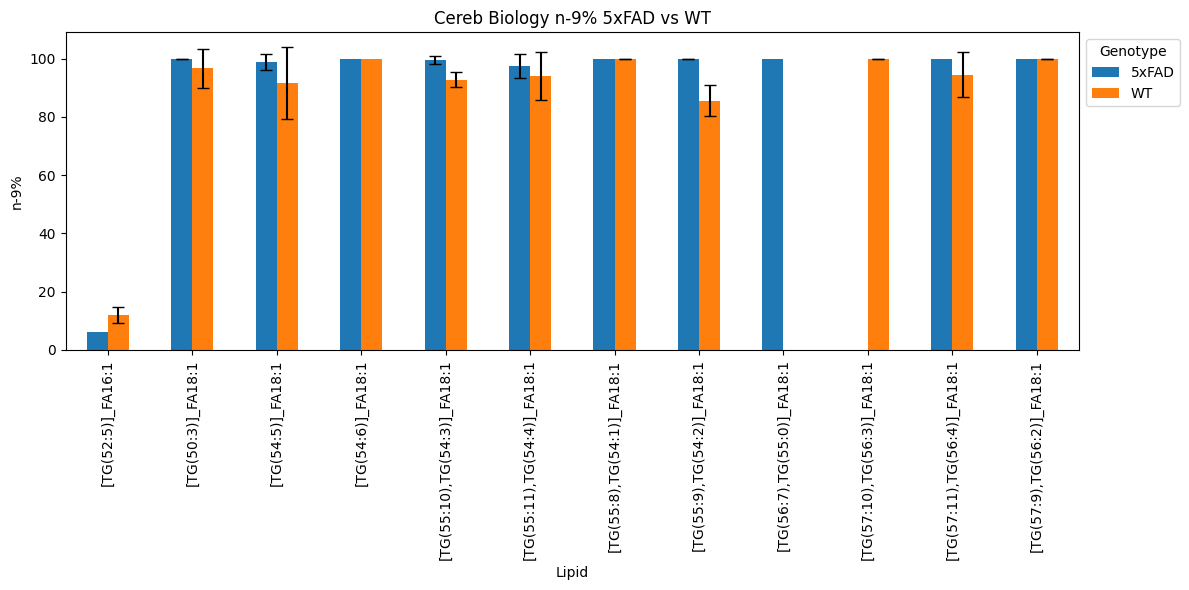

,Lipid,Genotype,n-9_avg,std_dev
0,[TG(52:5)]_FA16:1,WT,12.0,2.8
2,[TG(52:5)]_FA16:1,5xFAD,6.2,NaN
3,[TG(50:3)]_FA18:1,WT,96.7,6.6
7,[TG(50:3)]_FA18:1,5xFAD,100.0,0.0
11,[TG(54:5)]_FA18:1,WT,91.6,12.3
15,[TG(54:5)]_FA18:1,5xFAD,98.9,2.7
21,[TG(54:6)]_FA18:1,WT,100.0,NaN
22,[TG(54:6)]_FA18:1,5xFAD,100.0,NaN
23,"[TG(55:10),TG(54:3)]_FA18:1",WT,92.8,2.6
28,"[TG(55:10),TG(54:3)]_FA18:1",5xFAD,99.5,1.3


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_brain is your DataFrame from previous steps
df_cereb = df3.copy()
#filter out n-9% >0
df_cereb = df_cereb[df_cereb['n-9%'] > 0]

# Filter to include only rows where Biology is "cereb"
df_cereb = df_cereb[df_cereb['Biology'] == 'cereb']

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_cereb = df_cereb.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cereb.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cereb
df_cereb = df_cereb.merge(grouped_cereb, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cereb['n-9_avg'] = df_cereb['n-9_avg'].round(1)
df_cereb['std_dev'] = df_cereb['std_dev'].round(1)
df_cereb



# Create a copy of df_cereb to df_cereb_drop
df_cereb_drop = df_cereb[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cereb = df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df_cereb['Sort_Key'] = pivot_df_cereb.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_cereb = pivot_df_cereb.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_cereb.drop('Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cereb.plot(kind='bar', yerr=df_cereb_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)



# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Cereb Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Barplot_OzON/9%/Cereb 5xFAD vs WT.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Cereb 5xFAD vs WT.pdf', dpi=300)
plt.show()

df_cereb_drop


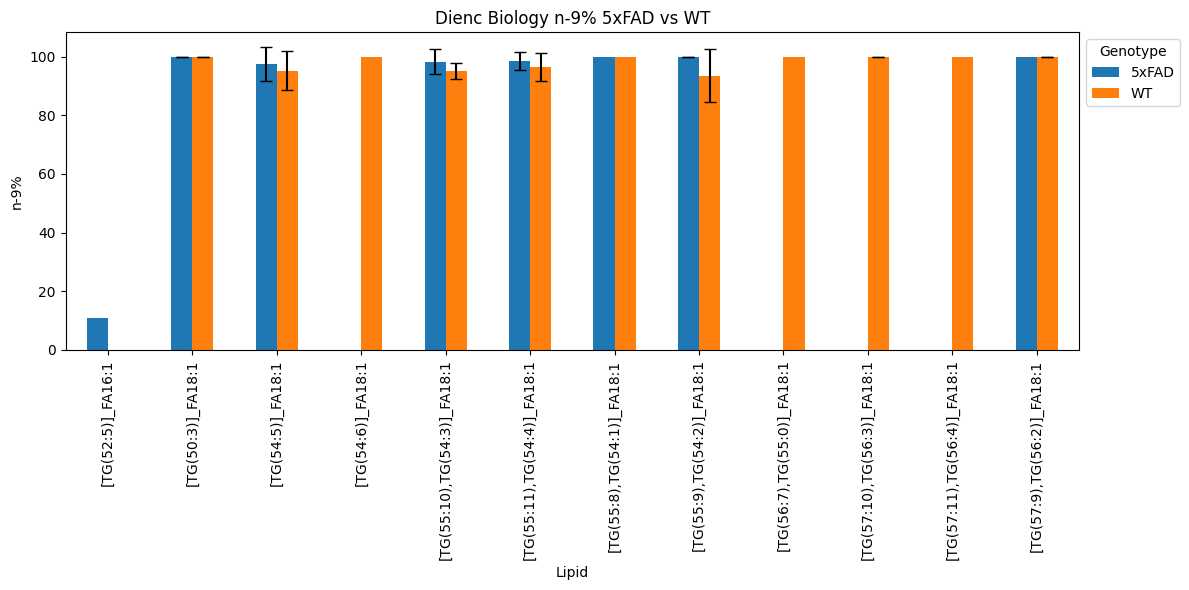

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your DataFrame
# Create a copy of df3 for the Dienc region
df_dienc = df3.copy()
df_dienc = df_dienc[(df_dienc['Biology'] == 'dienc') & (df_dienc['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and std dev of n-9%
grouped_dienc = df_dienc.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_dienc.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_dienc
df_dienc = df_dienc.merge(grouped_dienc, on=['Lipid', 'Genotype'], how='left')
df_dienc['n-9_avg'] = df_dienc['n-9_avg'].round(1)
df_dienc['std_dev'] = df_dienc['std_dev'].round(1)

# Create a copy of df_dienc to df_dienc_drop
df_dienc_drop = df_dienc[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_dienc = df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')
pivot_df_dienc['Sort_Key'] = pivot_df_dienc.index.str.contains('FA16:1').astype(int)
pivot_df_dienc = pivot_df_dienc.sort_values(by='Sort_Key', ascending=False)
pivot_df_dienc.drop('Sort_Key', axis=1, inplace=True)

# Plotting for Dienc
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_dienc.plot(kind='bar', yerr=df_dienc_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Dienc Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Barplot_OzON/9%/Dienc 5xFAD vs WT.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Dienc 5xFAD vs WT.pdf', dpi=300)
plt.show()


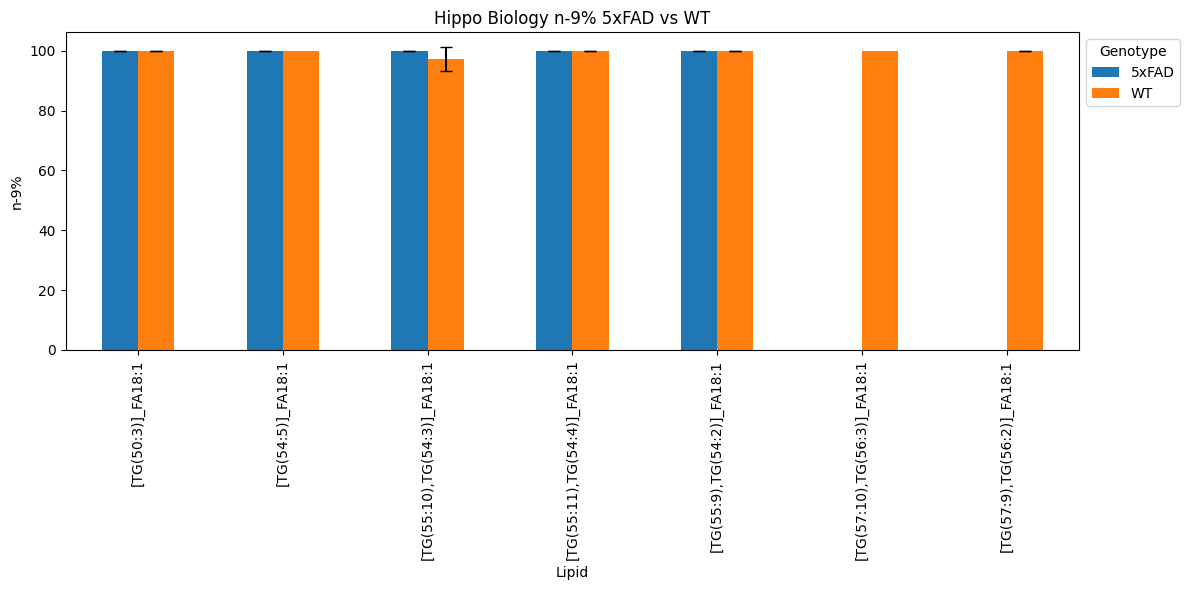

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_hippo = df3.copy()

# Filter to include only rows where Biology is "hippo" and n-9% values are greater than 0
df_hippo = df_hippo[(df_hippo['Biology'] == 'hippo') & (df_hippo['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_hippo = df_hippo.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_hippo.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_hippo
df_hippo = df_hippo.merge(grouped_hippo, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_hippo['n-9_avg'] = df_hippo['n-9_avg'].round(1)
df_hippo['std_dev'] = df_hippo['std_dev'].round(1)

# Create a copy of df_hippo to df_hippo_drop
df_hippo_drop = df_hippo[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_hippo = df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df_hippo['Sort_Key'] = pivot_df_hippo.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_hippo = pivot_df_hippo.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_hippo.drop('Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_hippo.plot(kind='bar', yerr=df_hippo_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Hippo Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Barplot_OzON/9%/Hippo 5xFAD vs WT.png', dpi=300)
#save as pdf    
plt.savefig('Barplot_OzON/9%/Hippo 5xFAD vs WT.pdf', dpi=300)
plt.show()


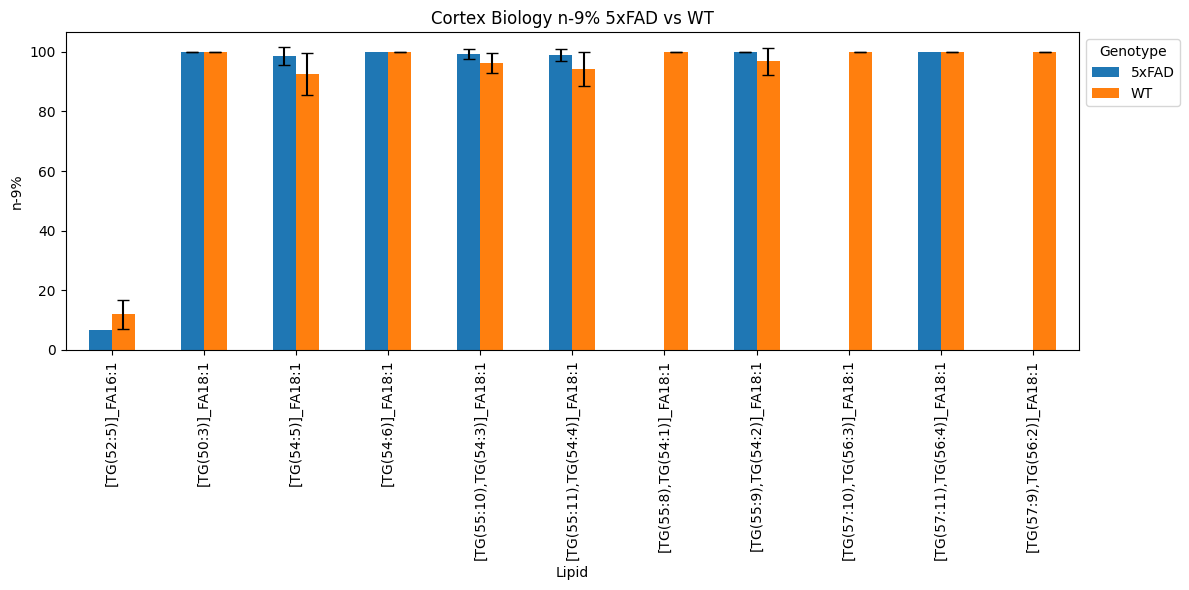

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 is your original DataFrame
df_cortex = df3.copy()

# Filter to include only rows where Biology is "cortex" and n-9% values are greater than 0
df_cortex = df_cortex[(df_cortex['Biology'] == 'cortex') & (df_cortex['n-9%'] > 0)]

# Group by Lipid and Genotype, then calculate mean and standard deviation of n-9%
grouped_cortex = df_cortex.groupby(['Lipid', 'Genotype'])['n-9%'].agg(['mean', 'std']).reset_index()
grouped_cortex.rename(columns={'mean': 'n-9_avg', 'std': 'std_dev'}, inplace=True)

# Merge these calculated values back to df_cortex
df_cortex = df_cortex.merge(grouped_cortex, on=['Lipid', 'Genotype'], how='left')

# Round the values to 1 decimal place
df_cortex['n-9_avg'] = df_cortex['n-9_avg'].round(1)
df_cortex['std_dev'] = df_cortex['std_dev'].round(1)

# Create a copy of df_cortex to df_cortex_drop
df_cortex_drop = df_cortex[['Lipid', 'Genotype', 'n-9_avg', 'std_dev']].drop_duplicates()

# Pivot the DataFrame to have Genotype as columns
pivot_df_cortex = df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first, if applicable
pivot_df_cortex['Sort_Key'] = pivot_df_cortex.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_cortex = pivot_df_cortex.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_cortex.drop('Sort_Key', axis=1, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_cortex.plot(kind='bar', yerr=df_cortex_drop.pivot(index='Lipid', columns='Genotype', values='std_dev'), ax=ax, capsize=4)

# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('Cortex Biology n-9% 5xFAD vs WT')
plt.xticks(rotation=90)
plt.legend(title='Genotype', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('Barplot_OzON/9%/Cortex 5xFAD vs WT.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Cortex 5xFAD vs WT.pdf', dpi=300)
plt.show()


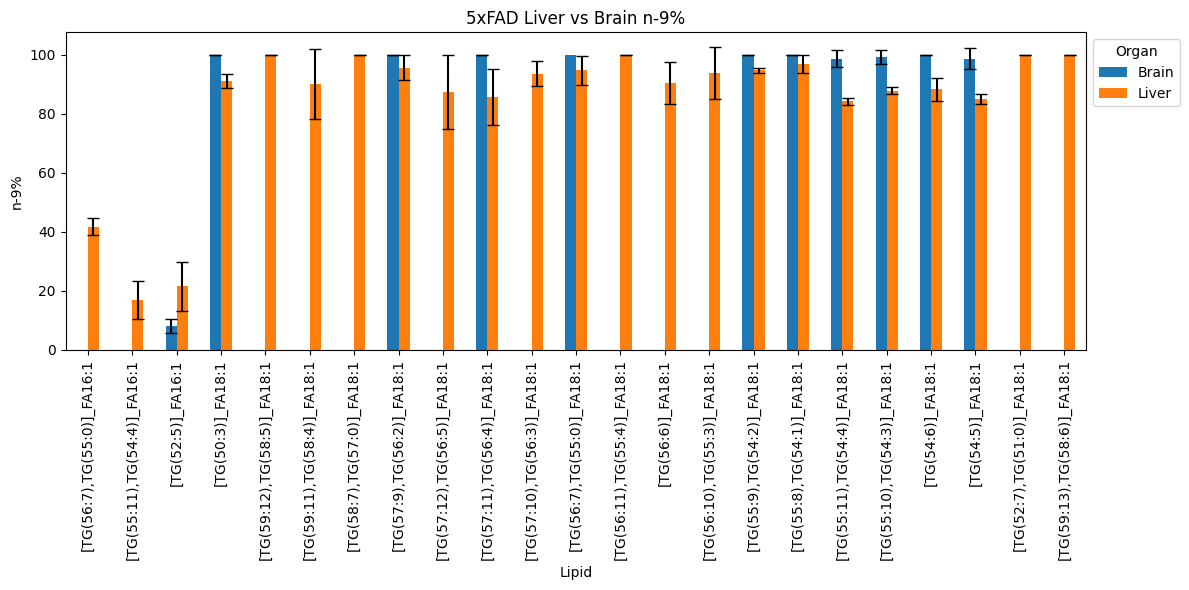

In [21]:
df_5xfad = pd.concat([df_liver, df_brain])
#delete 18:2 lipids
df_5xfad = df_5xfad[~df_5xfad['Lipid'].str.contains('FA18:2')]


# Filter the DataFrame to include only 5xFAD samples
df_5xfad = df_5xfad[df_5xfad['Genotype'] == '5xFAD']

# Create a new column 'Organ'
df_5xfad['Organ'] = df_5xfad['Biology'].apply(lambda x: 'Liver' if x == 'liver' else 'Brain')


df_5xfad_drop = df_5xfad[['Lipid', 'Organ','n-9_avg', 'std_dev']].drop_duplicates()
df_5xfad_drop.to_csv('df_5xfad_drop.csv')   


# Assuming df_5xfad_drop is created as per your code snippet

# Pivot the DataFrame to have Organ as columns
pivot_df_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='n-9_avg')

# Create a sorting key based on the index (Lipid names) to bring certain lipids first, if applicable
pivot_df_organ['Sort_Key'] = pivot_df_organ.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df_organ = pivot_df_organ.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df_organ.drop('Sort_Key', axis=1, inplace=True)

# Pivot the DataFrame for standard deviation values to be used as error bars
pivot_df_std_dev_organ = df_5xfad_drop.pivot(index='Lipid', columns='Organ', values='std_dev')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df_organ.plot(kind='bar', yerr=pivot_df_std_dev_organ, ax=ax, capsize=4)


# Rotating x-axis labels and setting labels/title
plt.xlabel('Lipid')
plt.ylabel('n-9%')
plt.title('5xFAD Liver vs Brain n-9%')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.legend(title='Organ', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.tight_layout()
#save figure to Barplot_OzON/9% folder
plt.savefig('Barplot_OzON/9%/Liver vs Brain 5xFAD n-9%.png', dpi=300)
#save as pdf
plt.savefig('Barplot_OzON/9%/Liver vs Brain 5xFAD n-9%.pdf', dpi=300)
plt.show()
# Assuming df_5xfad_drop is defined and contains the necessary columns
# Printing out the values for each lipid and Organ combination



# Assuming df_5xfad_drop is defined and contains the necessary columns
# Printing out the values for each lipid and Organ combination

